In [3]:
import pandas as pd

csv_input = pd.read_csv('files/dataset_trajectory.csv')
data = csv_input[list(('pos.x', 'pos.y'))]
data = csv_input

In [5]:
#data = data.head(28)
#data

In [6]:
#segment_counts = data['segment'].value_counts()
#segment_counts

In [7]:
#segment_counts['segment14']

In [4]:
# Transform segment to Integer
# Identify unique values in the 'Segment' column

#unique_segments = data['segment'].unique()


In [5]:
# Create a mapping of unique values to integers

#segment_mapping = {segment: i+1 for i, segment in enumerate(unique_segments)}

In [6]:
# Replace values in the 'Segment' column using the mapping

#data['segment'] = data['segment'].replace(segment_mapping)

In [8]:
#segment_counts = data['segment'].value_counts()
#segment_counts

In [9]:
#segmentType_counts = data['segType'].value_counts()
#segmentType_counts

In [9]:
# Remove all rows with 'unknown' values in clumn 'segType'

#data=data[data['segType'] != 'unknown']

In [10]:
#segmentType_counts = data['segType'].value_counts()
#segmentType_counts

In [11]:
# Transform segType to Integer
# Identify unique values in the 'Segment' column

#unique_segTypes = data['segType'].unique()

In [12]:
# Create a mapping of unique values to integers

#segType_mapping = {segType: i+1 for i, segType in enumerate(unique_segTypes)}

In [11]:
# Replace values in the 'Segment' column using the mapping

#data['segType'] = data['segType'].replace(segType_mapping)

In [12]:
#segmentType_counts = data['segType'].value_counts()
#segmentType_counts

In [15]:
#data.to_csv('files/trajectory_rid.csv', index=False)

In [22]:
#data1 = data[list(('x', 'y', 'segment'))]

In [26]:
#filtered_df = data1[data1['segment'] == 2]

In [13]:
#observed = filtered_df.to_numpy()
#observed

In [14]:
observed = data.to_numpy()
observed

array([[-7.70306702e+01, -1.28344846e+00,  2.94199973e-01,
        -1.56836220e+00,  7.05600100e+00,  2.00000000e+00],
       [-7.70306702e+01, -1.28344846e+00,  6.13106526e-02,
        -1.56836220e+00,  7.17255778e+00,  2.00000000e+00],
       [-7.70297775e+01, -1.28353894e+00, -3.03188320e-02,
        -1.56844263e+00,  1.05302784e+00,  2.00000000e+00],
       ...,
       [ 3.51016541e+01, -2.70580444e+01, -1.10165020e-02,
        -5.12259058e-04,  2.19122579e+01,  2.00000000e+00],
       [ 3.51019516e+01, -2.64580898e+01, -1.10211177e-02,
        -5.09595895e-04,  2.16001143e+01,  2.00000000e+00],
       [ 3.51022415e+01, -2.58656235e+01, -1.10353082e-02,
        -5.09595890e-04,  2.13640130e+01,  2.00000000e+00]])

In [15]:
import matplotlib.pyplot as plt
#If you want to do it in town11 use:
#center = (390, 700)
#x_scale = 1/25
#y_scale = -1/25

def calculatePosition(x,y):
    center = (390, 330)
    #center = (390, 700)
    x_scale = 1.25
    y_scale = -1.25
    return ((x*x_scale+center[0]), (y*y_scale+center[1]))

def plot_pred(observed, future, predicted):
    #img = plt.imread("assets/Town05_0.5sqk.jpg")

    img = plt.imread("assets/Town11_400sqk.png")

    fig, ax = plt.subplots()
    ax.imshow(img)

    xs = []
    ys = []
    fxs = []
    fys = []
    pxs = []
    pys = []
    
    for v in observed:
        (x,y) = calculatePosition(v[0], v[1])
        xs.append(x)
        ys.append(y)

    for v in future[:len(predicted)]:
        (x,y) = calculatePosition(v[0], v[1])
        fxs.append(x)
        fys.append(y)
    
    for v in predicted:
        (x,y) = calculatePosition(v[0], v[1])
        pxs.append(x)
        pys.append(y)

    plt.scatter(fxs, fys, color="orange", zorder=1)
    plt.scatter(pxs, pys, color="red", zorder=3)
    plt.scatter(xs, ys, color="blue", zorder=2)
    plt.legend(['ActualFuture', 'PredictedFuture', 'Input'])
    plt.show()

def plot(observed):
    img = plt.imread("assets/Town05_0.5sqk.jpg")

    #img = plt.imread("assets/Town11_400sqk.png")

    fig, ax = plt.subplots()
    ax.imshow(img)

    xs = []
    ys = []
    
    for v in observed:
        (x,y) = calculatePosition(v[0], v[1])
        xs.append(x)
        ys.append(y)
    
    marker_on = [xs[0], xs[len(xs)-1]]

    plt.scatter(xs, ys, color="blue", zorder=2)
    plt.legend(['ActualFuture'])
    plt.show()

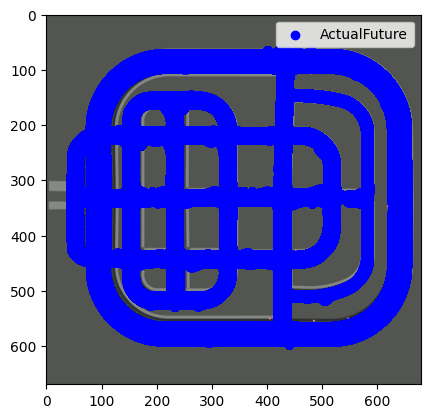

In [16]:
plot(observed=observed)

In [ ]:
size = 10000000

for item in range(0, 162):
    csv_input = pd.read_csv('files/data_07mars2024/random_'+str(item)+'.csv')
    data = csv_input[list(('x', 'y'))]
    if size > len(data):
        size = len(data)

size